In [ ]:
# load libraries
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Load the data and split it between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# pré-processamento de dados

In [ ]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)

y_train shape: (60000, 10)


# Construção do modelo

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.25),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

# Treinamento do modelo

In [ ]:
# Hyperparameters
batch_size = 128
epochs = 30
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

from sklearn.model_selection import train_test_split

# Separate the test data
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

# model training
history = model.fit(X_train1,
                    y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/30
375/375 [==============================] - 7s 8ms/step - loss: 0.3475 - accuracy: 0.8962 - val_loss: 0.1112 - val_accuracy: 0.9660
Epoch 2/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0989 - accuracy: 0.9699 - val_loss: 0.0738 - val_accuracy: 0.9785
Epoch 3/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0753 - accuracy: 0.9771 - val_loss: 0.0619 - val_accuracy: 0.9812
Epoch 4/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0621 - accuracy: 0.9814 - val_loss: 0.0496 - val_accuracy: 0.9846
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0531 - accuracy: 0.9836 - val_loss: 0.0498 - val_accuracy: 0.9847
Epoch 6/30
375/375 [==============================] - 2s 4ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.0454 - val_accuracy: 0.9855
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0405 - accuracy: 0.9878 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 

# avaliação do modelo

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03218773007392883
Test accuracy: 0.9914000034332275


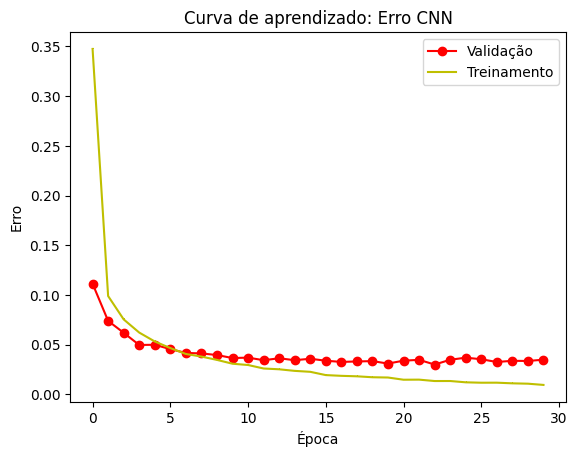

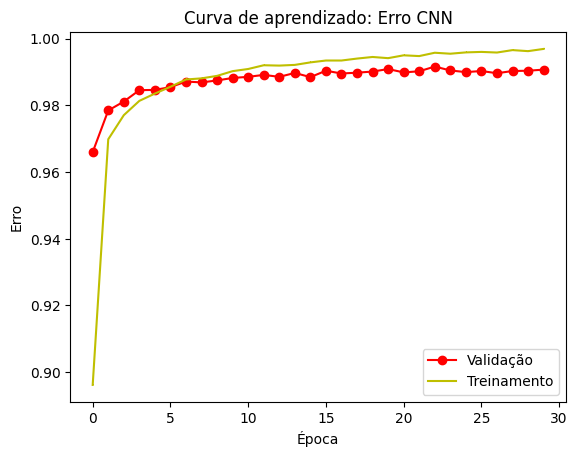

In [ ]:
plt.figure()
plt.plot(history.epoch, history.history['val_loss'], 'o-r', label="Validação")
plt.plot(history.epoch, history.history['loss'],',-y', label="Treinamento")
plt.title("Curva de aprendizado: Erro CNN")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.legend()

plt.figure()
plt.plot(history.epoch, history.history['val_accuracy'], 'o-r', label="Validação")
plt.plot(history.epoch, history.history['accuracy'],',-y', label="Treinamento")
plt.title("Curva de aprendizado: Erro CNN")
plt.xlabel("Época")
plt.ylabel("Erro")
plt.legend()

# Teste do modelo

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax (y_pred, axis = 1)
y_true = np.argmax (y_test, axis = 1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Axes: >

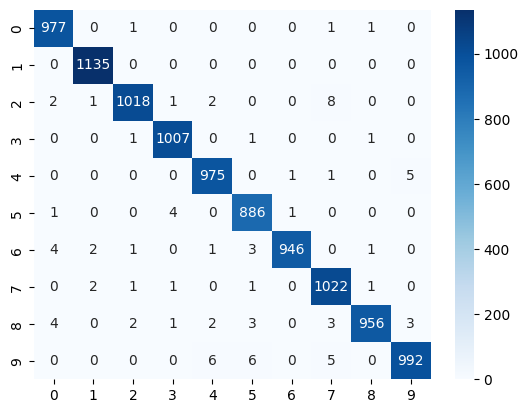

In [ ]:
cm = confusion_matrix(y_true,y_pred)
sns.heatmap(cm, annot=True,fmt='.0f', cmap='Blues' )
